# Functional PCA
[1] James Ramsay and Bernard W. Silverman. Functional Data Analysis. Springer Series in Statistics. Springer-Verlag, New York, second edition, 2005. ISBN 978-0-387-40080-8. URL: https://www.springer.com/gp/book/9780387400808 (visited on 2021-09-19), doi:10.1007/b98888.

In [282]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [283]:
N = 200 # number of points
n = 100 # number of samples/observations
p = 20 # number of variables/features

C = np.random.randint(0, 3, size=(p,p))
r = np.random.multivariate_normal(np.zeros(p), C + C.T, size=(N, n))

t = np.linspace(0, 1, N)
x = np.cumsum((1/np.sqrt(N))*r, axis=0)

/tmp/ipykernel_1407/3709331759.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  r = np.random.multivariate_normal(np.zeros(p), C + C.T, size=(N, n))


Simulate a multidimensional Brownian motion with covariance given by the product of $\Sigma = CC^T$ (it needs to be symmetric) where $C$ is a random matrix. Then, the simulated Brownian motion is given by
$$
X_{t+1} = X_{t} + \sqrt{\Delta t}\mathcal{N}(0, \Sigma)
$$

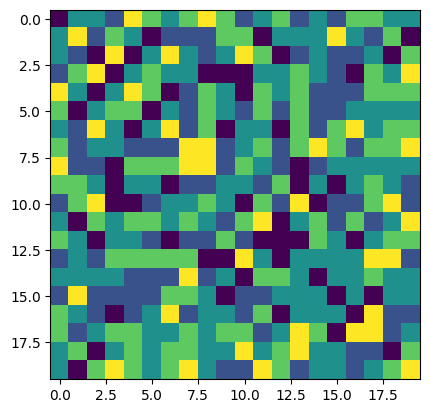

In [284]:
# plot the covariance matrix
plt.imshow(C + C.T)

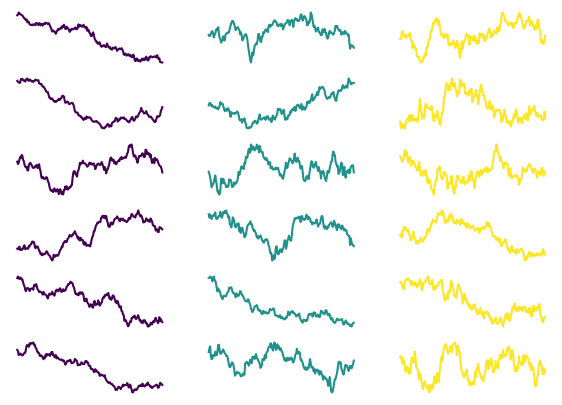

In [285]:
# plot a sample of 6 observations of the first 3 variables
fig, axs = plt.subplots(6, 3, figsize=(7, 5))
cmap = matplotlib.colormaps['viridis'].resampled(3)
for i in range(6):
    for j in range(3):
        ax = axs[i,j]
        ax.plot(t, x[:, i,j], c=cmap(j))
        ax.set_axis_off()

### Calculate the empirical covariance matrix

In [286]:
mu = np.mean(x, axis=1, keepdims=True)
x_norm = x - mu
cov = (x_norm.transpose(0,2,1) @ x_norm) / (n-1)

### Calculate the eigenvalues and Eigenvalues

In [287]:
eigenvalues, eigenvectors = np.linalg.eigh(cov)
#idx = np.argsort(np.abs(eigenvalues))[:, ::-1]
#eigenvalues = eigenvalues[idx]
#eigenvectors = eigenvectors[:, :, idx]

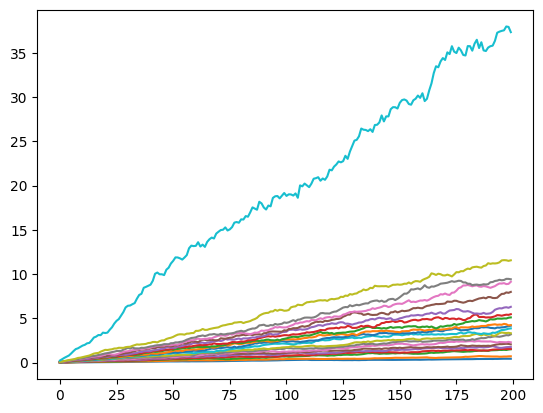

In [288]:
plt.plot(eigenvalues)
plt.show()

In [289]:
#for i in range(1, eigenvectors.shape[0]):
#    eigenvectors[i] *= np.sign(np.sum(eigenvectors[i] * eigenvectors[i-1], axis=0, keepdims=True))

In [293]:
k=10
Z = x_norm @ eigenvectors[:, :, :k]
x_norm_hat = Z @ eigenvectors[:, :, :k].transpose(0,2,1)

In [294]:
print("Mean Square Error ", np.mean(np.square(x_norm - x_norm_hat)))

Mean Square Error  2.572687273758307


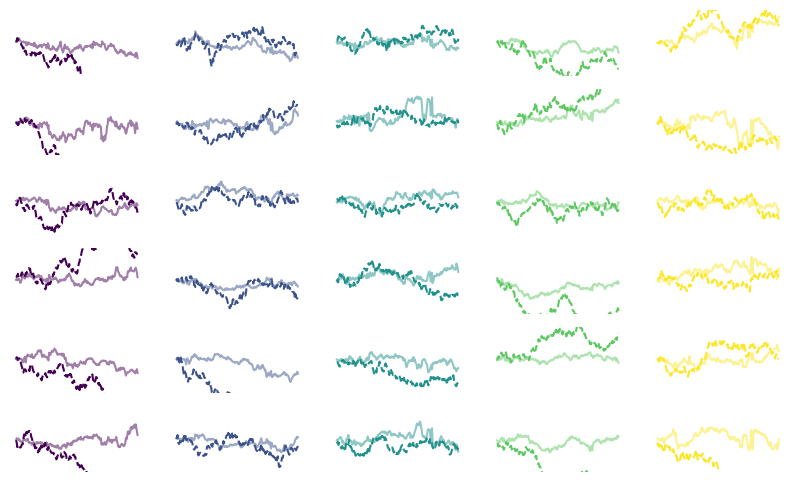

In [296]:
# plot a sample of n_r observations of the first n_c variables
n_r, n_c = 6, 5
fig, axs = plt.subplots(n_r, n_c, figsize=(10, 6))
cmap = matplotlib.colormaps['viridis'].resampled(n_c)
for i in range(n_r):
    for j in range(n_c):
        ax = axs[i,j]
        ax.plot(t, x[:, i,j], c=cmap(j), linestyle='dashed')
        ax.plot(t, x_norm_hat[:, i,j] + mu[:, 0, j], c=cmap(j), alpha=0.5)
        ax.set_axis_off()
        ax.set_ylim((-3,3))